In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [6]:
# Create a path to the CSV files 
als_csv_path = 'Resources/GOT_ASL.csv'
als_df = pd.read_csv(als_csv_path)
GOT_deathdata_path = "Resources/GOT_data_set.csv"

In [7]:
#read the CSV files into a Pandas DataFrame
als_df = pd.read_csv(als_csv_path)
GOT_df = pd.read_csv(GOT_deathdata_path)
GOT_df.head()

In [8]:
GOT_df.rename(columns={"order": "Order", "season": "Season", "episode":"Episode", "character_killed":"Character Killed", "killer":"Killer", 
                       "method":"Method", "method_cat":"Method Category", "reason":"Reason", "location":"Location", 
                       "allegiance":"Allegiance", "importance":"Importance"}, inplace=True)

GOT_df

In [9]:
GOT_df.drop(columns={"Season","Episode"})

In [10]:
#AVERAGE LIFESPAN ANALYSIS
#Rename columns
als_df.rename(columns={"name": "Name", "male": "Male", "dateOfBirth":"Date of Birth", "DateoFdeath":"Date of Death", "house":"Allegiance", 
                       "age":"Age at Death", "isAlive":"Alive"}, inplace=True)
# Drop all rows with missing information
als_df = als_df.dropna(how='any')
# List unique values of Houses to locate any that may be the same
als_df["Allegiance"].unique()

array(['House Arryn', 'House Targaryen', "Night's Watch",
       'House Velaryon', 'wildling', 'House Lannister', 'House Frey',
       'House Osgrey', 'House Hightower', 'House Tully', 'House Manderly',
       'House Westerling', 'House Martell', 'House Crakehall',
       'House Rosby', 'House Cerwyn', 'House Swann', 'House Strong',
       'House Lonmouth', 'House Stark', 'House Beesbury', 'House Darry',
       'House Hollard', 'House Wythers', 'House Bracken',
       'House Tallhart', 'House of Loraq', 'House Hetherspoon',
       'House Blackfyre', 'House Cole', 'House Baratheon', 'House Bolton',
       'House Stokeworth', 'House Clegane', 'House Morrigen',
       'House Greyjoy', 'Mance Rayder', 'House Mormont', 'House Egen',
       'House Royce'], dtype=object)

In [11]:
# Combine similar applicants together based on their Allegiance 
als_df["Allegiance"] = als_df["Allegiance"].replace({"House Manderly": "House Stark", "House Bolton": "House Stark", "House Mormont": "House Stark", 
                                                   "House Clegane": "House Lannister", "wildling": "Wildlings", "Mance Rayder": "Wildlings",
                                                  "House Westerling": "House Lannister", "House Lonmouth": "House Baratheon", "House of Loraq": "House Targaryen", 
                                                    "House Royce": "House Arryn", "House Egen": "House Arryn","House Frey": "House Tully", "House Crakehall": "House Lannister", 
                                                   "House Hightower": "House Tyrell","House Cerwyn": "House Stark", "House Swann": "House Baratheon", 
                                                   "House Darry": "House Tully", "House Tallhart": "House Stark", "House Morrigen": "House Baratheon", 
                                                   "House Bracken": "House Tully","House Wythers": "House Tyrell", "House Hetherspoon": "House Lannister", 
                                                   "House Strong": "House Tully","House Osgrey": "House Tyrell", "House Cole": "House Baratheon", "House Beesbury" : "House Tyrell",
                                                  "House Rosby": "Other Houses", "House Hollard": "Other Houses", "House Stokeworth": "Other Houses", 
                                                   "House Blackfyre": "Other Houses", "House Velaryon": "Other Houses"})
als_df["Allegiance"].unique()

array(['House Arryn', 'House Targaryen', "Night's Watch", 'Other Houses',
       'Wildlings', 'House Lannister', 'House Tully', 'House Tyrell',
       'House Stark', 'House Martell', 'House Baratheon', 'House Greyjoy'],
      dtype=object)

In [12]:
#Calculate the average lifespan for all values in dataset
avg_lsp = als_df["Age at Death"].mean()
# Create a DataFrame with columns "Name","Date of Birth", "Date of Death", "Age", and "Allegiance".
a_df = als_df[["Name","Age at Death", "Allegiance"]]
# Create a dataframe of the average lifespan for each Allegiance.
avg_age_group = a_df.groupby(["Allegiance"])
totals_df = avg_age_group.mean()
#Display Results
print("The average lifespan in Game of Thrones is " + str(avg_lsp) + " years.")
totals_df

The average lifespan in Game of Thrones is 34.1271186440678 years.


,Age at Death
Allegiance,
House Arryn,38.800000
House Baratheon,26.000000
House Greyjoy,14.500000
House Lannister,36.071429
House Martell,20.666667
House Stark,35.076923
House Targaryen,29.821429
House Tully,39.750000
House Tyrell,45.166667


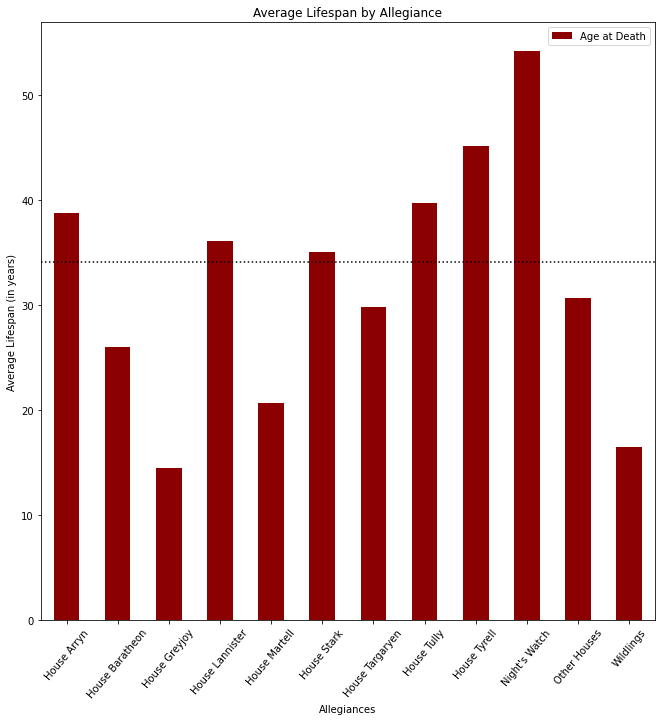

<Figure size 432x288 with 0 Axes>

In [13]:
# Create a bar chart based off of the group series from before
als_chart = totals_df.plot(kind='bar', color="darkred", rot=50, figsize=(11,11))

# Set the xlabel and ylabel
als_chart.set_ylabel("Average Lifespan (in years)")
als_chart.set_xlabel("Allegiances")
als_chart.set_title("Average Lifespan by Allegiance")

#Set threshold line at the average lifespan 
plt.axhline(avg_lsp, color='black', ls='dotted')

plt.show()
plt.tight_layout()